**Stock prices forecasting with LSTM and DL**

In this assignment,we are using LSTM and DL to predict stock prices of Alphabet INC. The dataset has been obtained from Yahoo Finance and has the data of last 5 years which means around 1200 records. The dataset contains the following fields: Date, Open, High, Low, Close, Volume.
Our aim in this assignment is to predict the stock prices of Alphabet. We will be using LSTM and Deep Learning to create a model to predict the future stock prices of Alphabet.

In [46]:
#Necessary imports for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [6]:
# Load the dataset
df = pd.read_csv('/content/sample_data/googlestock5Y.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-12,51.752499,52.422501,51.164501,51.977501,36154000
2018-11-12,52.824501,53.029999,51.992001,52.587502,27894000
2018-12-12,53.400002,54.082500,53.139500,53.183998,30476000
2018-12-13,53.403500,53.987999,52.696499,53.095001,26596000
2018-12-14,52.499001,53.130001,52.039501,52.105000,33732000


In [7]:
# Checking for missing values
df.isnull().sum()


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

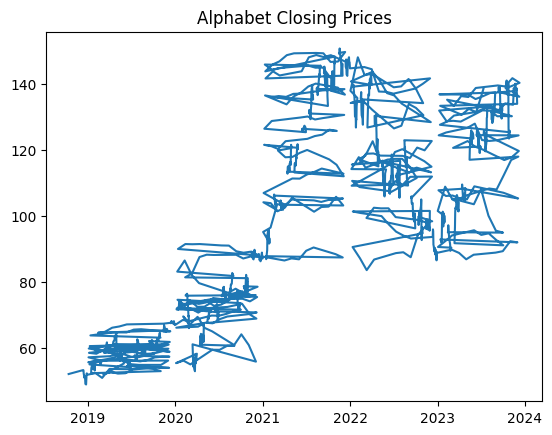

In [8]:
# Plotting the closing prices
plt.plot(df['Close'])
plt.title('Alphabet Closing Prices')
plt.show()

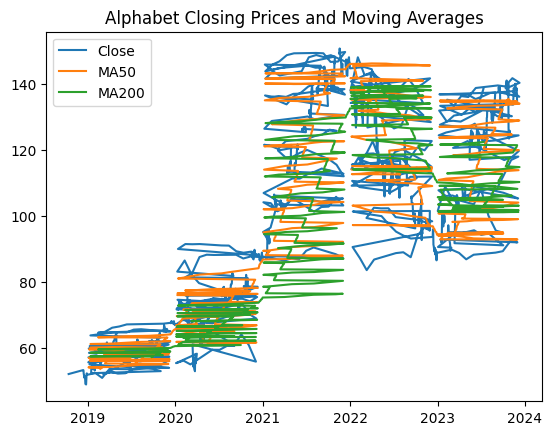

In [10]:
# Calculating and plotting the moving average
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()


plt.plot(df['Close'], label='Close')
plt.plot(df['MA50'], label='MA50')
plt.plot(df['MA200'], label='MA200')
plt.title('Alphabet Closing Prices and Moving Averages')
plt.legend()
plt.show()

The stock is very bullish and has a general upward trend

In [12]:
# Calculating the daily returns
df['Returns'] = df['Close'].pct_change()
df['Returns']


Date
2018-10-12         NaN
2018-11-12    0.011736
2018-12-12    0.011343
2018-12-13   -0.001673
2018-12-14   -0.018646
                ...   
2023-01-12   -0.004480
2023-04-12   -0.020177
2023-05-12    0.013473
2023-06-12   -0.007251
2023-07-12    0.053412
Name: Returns, Length: 1258, dtype: float64

In [13]:
# Calculating the volatility
df['Volatility'] = df['Returns'].rolling(20).std()
df['Volatility']

Date
2018-10-12         NaN
2018-11-12         NaN
2018-12-12         NaN
2018-12-13         NaN
2018-12-14         NaN
                ...   
2023-01-12    0.011258
2023-04-12    0.011901
2023-05-12    0.012141
2023-06-12    0.012146
2023-07-12    0.017063
Name: Volatility, Length: 1258, dtype: float64

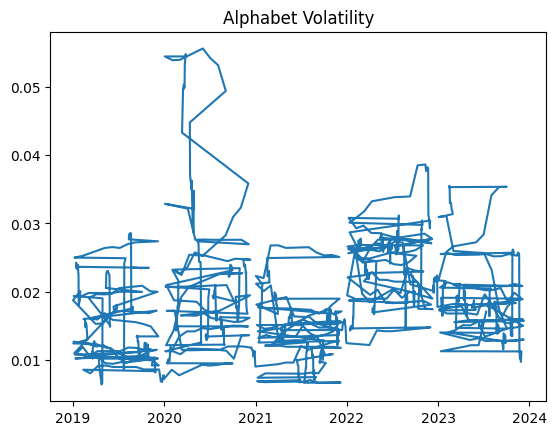

In [14]:
# Plotting the volatility
plt.plot(df['Volatility'])
plt.title('Alphabet Volatility')
plt.show()

In [15]:
# Calculating the autocorrelation
df['Autocorrelation'] = df['Returns'].rolling(20).corr(df['Returns'].shift(1))
df['Autocorrelation']

Date
2018-10-12         NaN
2018-11-12         NaN
2018-12-12         NaN
2018-12-13         NaN
2018-12-14         NaN
                ...   
2023-01-12    0.014060
2023-04-12    0.039674
2023-05-12   -0.102479
2023-06-12   -0.155231
2023-07-12   -0.218289
Name: Autocorrelation, Length: 1258, dtype: float64

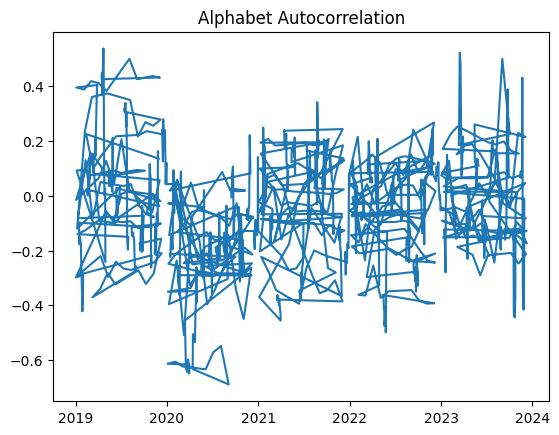

In [16]:
# Plotting the autocorrelation
plt.plot(df['Autocorrelation'])
plt.title('Alphabet Autocorrelation')
plt.show()

In [18]:
# Performing the Augmented Dickey-Fuller test for stationarity
adf_test = adfuller(df['Close'])
print('ADF test statistic:', adf_test[0])
print('p-value:', adf_test[1])

ADF test statistic: -1.2070558776104214
p-value: 0.6705531102119122


The ADF is in negative values which means that the time series could be non stationery but since p value is more than 5% we cant be conclusive.

In [28]:
#keeping only the necessary columns
df=df[['Open','High','Low','Close','Volume']]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-12,51.752499,52.422501,51.164501,51.977501,36154000
2018-11-12,52.824501,53.029999,51.992001,52.587502,27894000
2018-12-12,53.400002,54.082500,53.139500,53.183998,30476000
2018-12-13,53.403500,53.987999,52.696499,53.095001,26596000
2018-12-14,52.499001,53.130001,52.039501,52.105000,33732000


In [22]:
#scaling the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [29]:
# Splitting the data into training and testing sets
X_train = scaled_data[:-12][:, :, np.newaxis]
X_test = scaled_data[-12:][:, :, np.newaxis]
y_train = df['Close'].iloc[:-12]
y_test = df['Close'].iloc[-12:]

In [30]:
# Creating the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))


In [31]:
# Compiling and training the model
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
39/39 [==============================] - 3s 17ms/step - loss: 9889.9072
Epoch 2/100
39/39 [==============================] - 1s 16ms/step - loss: 6983.2480
Epoch 3/100
39/39 [==============================] - 1s 15ms/step - loss: 5853.0430
Epoch 4/100
39/39 [==============================] - 1s 15ms/step - loss: 5085.2173
Epoch 5/100
39/39 [==============================] - 1s 15ms/step - loss: 4446.2241
Epoch 6/100
39/39 [==============================] - 1s 15ms/step - loss: 3899.5444
Epoch 7/100
39/39 [==============================] - 1s 16ms/step - loss: 3429.3528
Epoch 8/100
39/39 [==============================] - 0s 10ms/step - loss: 3025.3835
Epoch 9/100
39/39 [==============================] - 0s 10ms/step - loss: 2676.2312
Epoch 10/100
39/39 [==============================] - 0s 9ms/step - loss: 2377.8486
Epoch 11/100
39/39 [==============================] - 0s 9ms/step - loss: 2121.3608
Epoch 12/100
39/39 [==============================] - 0s 9ms/step - loss: 19

In [32]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 1s 751ms/step


array([[139.79343],
       [140.95493],
       [140.74307],
       [139.72331],
       [139.43202],
       [140.45444],
       [137.35425],
       [133.48978],
       [131.18095],
       [131.24704],
       [132.9559 ],
       [139.20847]], dtype=float32)

In [39]:
# Reshaping y_pred to a 1D array
y_pred = y_pred.reshape(-1)
y_pred

array([139.79343, 140.95493, 140.74307, 139.72331, 139.43202, 140.45444,
       137.35425, 133.48978, 131.18095, 131.24704, 132.9559 , 139.20847],
      dtype=float32)

In [41]:

# Let us calculate the mean squared error
mse = np.mean(np.square(y_pred - y_test))
print('Mean Squared Error:', mse)


Mean Squared Error: 3.737603401851672


In [43]:
# Let us calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 1.5627924839681004


In [44]:
# Let us calculate the R squared value
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.6235254479335808


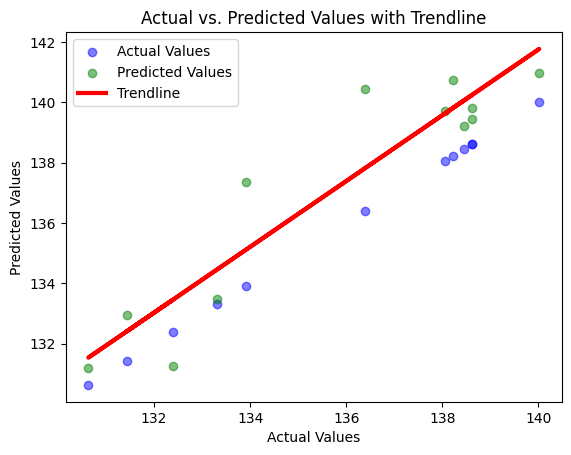

In [48]:
# Let us plot predicted vs. actual values

plt.scatter(y_test, y_test, label='Actual Values', color='blue', alpha=0.5)


plt.scatter(y_test, y_pred, label='Predicted Values', color='green', alpha=0.5)


regression_line = LinearRegression()
regression_line.fit(y_test.values.reshape(-1, 1), y_pred)


plt.plot(y_test, regression_line.predict(y_test.values.reshape(-1, 1)), color='red', linewidth=3, label='Trendline')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values with Trendline')
plt.legend()
plt.show()